### Grupo 12
## Entrega 2
### Predicción De La Edad del Abalon

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('./data/abalone.csv')

### Data pre processing

In [107]:
columns_to_rescale = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']

df[columns_to_rescale] = df[columns_to_rescale] * 200
df.head(5)
df.shape

(4177, 9)

In [108]:
from sklearn.preprocessing import PolynomialFeatures

Q1 = df['Rings'].quantile(0.25)
Q3 = df['Rings'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

# print(f'lower whisker: {lower_whisker}, upper whisker: {upper_whisker}')


# outliers = df[(df['Rings'] > 15.5) | (df['Rings'] < 3.5)]
# outliers.count()

df = df[(df['Rings'] < 15.5) & (df['Height'] < 70) & (df['Shucked_weight'] < 250) & (df['Viscera_weight'] < 120) & (df['Shell_weight'] < 150)]
# df = df[(df['Rings'] < 15.5) & (df['Height'] < 70) & (df['Shucked_weight'] < 250)]
df.count()

# columns_to_log = ['Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
# columns_to_transform = ['Length', 'Diameter', 'Height']

# df[columns_to_log] = np.log(df[columns_to_log])

# sns.boxplot(df, y='Rings')
# df['Whole_weight'].describe()

Sex               3907
Length            3907
Diameter          3907
Height            3907
Whole_weight      3907
Shucked_weight    3907
Viscera_weight    3907
Shell_weight      3907
Rings             3907
dtype: int64

In [109]:
# sns.boxplot(df, y='Viscera_weight')

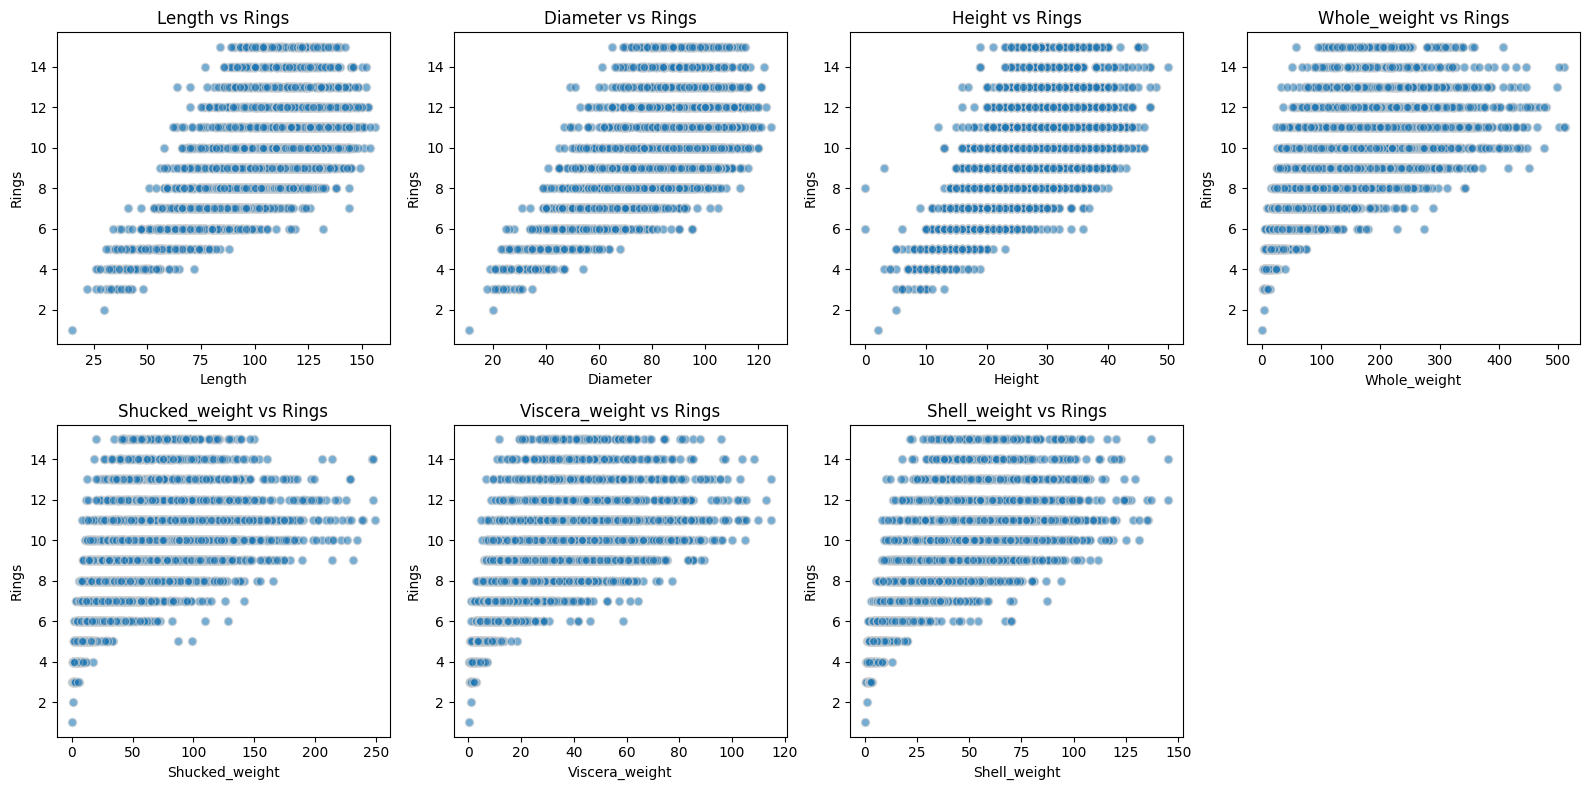

In [110]:
features= df.drop(columns=['Sex', 'Rings'], axis=0)
target = df['Rings']

fig, axs = plt.subplots(2,4, figsize=(16, 8))
axs = axs.flatten()

for i, feature in enumerate(features.columns):
    axs[i].scatter(features[feature], target, alpha = 0.6, edgecolor= 'lightgray')
    axs[i].set_title(f'{feature} vs Rings')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Rings')

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
# plt.show() 

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, root_mean_squared_error

X = df[['Length', 'Whole_weight']]
y = df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [112]:
## calcular la media del target

### Linear Regression (2 features)

In [113]:
linear_reg = LinearRegression().fit(X_train, y_train)

y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

rmse_train = root_mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
score = cross_val_score(linear_reg, X, y, cv=10)
residue = y_test - y_test_pred

# print(f'RMSE: {rmse:.3f}')
# print(f'R square score: {r2:.3f}')
# print(f'model accuracy: {score.mean():.3f}, standard deviation: {score.std():.3f}')
lr_perf_df = pd.DataFrame({'rmse_train': [rmse_train], 'rmse_test': [rmse_test], 'R2_train': [r2_train], 
                           'R2_test': [r2_test], 'cv_score_mean': [score.mean()], 'cv_score_std': [score.std()]})
lr_perf_df

,rmse_train,rmse_test,R2_train,R2_test,cv_score_mean,cv_score_std
0,1.858511,1.909877,0.390102,0.417473,0.309525,0.130048


Text(0, 0.5, 'Prediction')

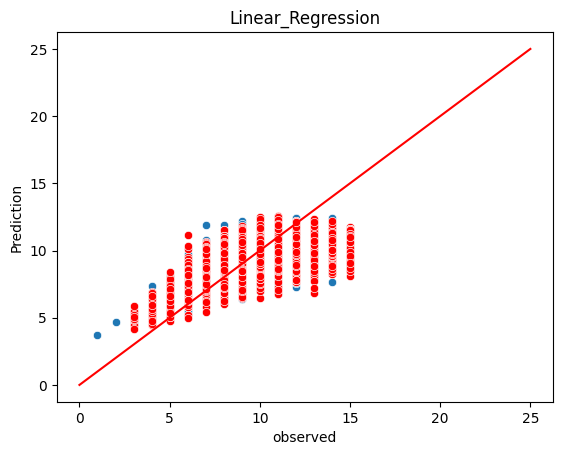

In [114]:
sns.scatterplot(x=y_test, y=y_test_pred)
sns.scatterplot(x=y_train, y=y_train_pred, color='red')
plt.plot([0,25],[0,25], color='red')
plt.title('Linear_Regression')
plt.xlabel('observed')
plt.ylabel('Prediction')

Text(0.5, 1.0, 'Residue distribution')

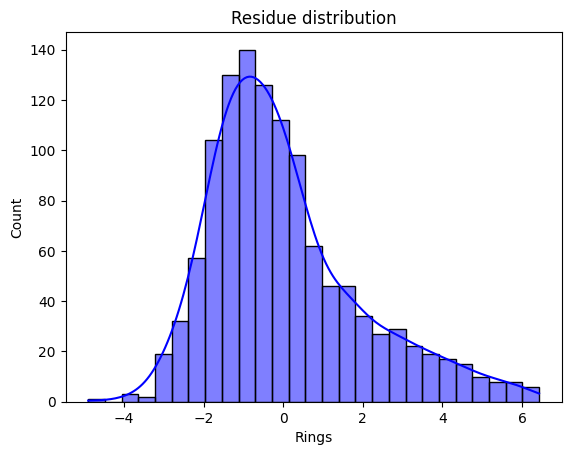

In [115]:
sns.histplot(x=residue, kde=True, color='blue')
plt.title('Residue distribution')

### Data pre processing

In [116]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, RandomForestClassifier, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
X = df[['Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Height', 'Sex', 'Diameter', 'Length']]
# X = df[['Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Height', 'Sex', 'Diameter']]
X = pd.get_dummies(X, columns=['Sex'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)

feature_names = X.columns

### Linear Regression (mas de dos features)

In [117]:
# podemos usar regresion lineal(lasso) para preceleccionar las variables a fitear en este modelo de regresion lineal.
linear_reg = LinearRegression().fit(X_train, y_train)

lin_reg_train_pred = linear_reg.predict(X_train)
lin_reg_pred = linear_reg.predict(X_test)

rmse_train = root_mean_squared_error(y_train, lin_reg_train_pred)
r2_train = r2_score(y_train, lin_reg_train_pred)
rmse_test = root_mean_squared_error(y_test, lin_reg_pred)
r2_test = r2_score(y_test, lin_reg_pred)
score = cross_val_score(linear_reg, X,y, cv=10)

lr_perf_df = pd.DataFrame({'rmse_train': [rmse_train], 'rmse_test': [rmse_test], 'R2_train': [r2_train], 
                           'R2_test': [r2_test], 'cv_score_mean': [score.mean()], 'cv_score_std': [score.std()]})

# print(f'RMSE: {rmse:.3f}')
# print(f'R square score: {r2:.3f}')
lr_perf_df

,rmse_train,rmse_test,R2_train,R2_test,cv_score_mean,cv_score_std
0,1.6326,1.651903,0.538512,0.548537,0.462418,0.083308


Text(0, 0.5, 'Prediction')

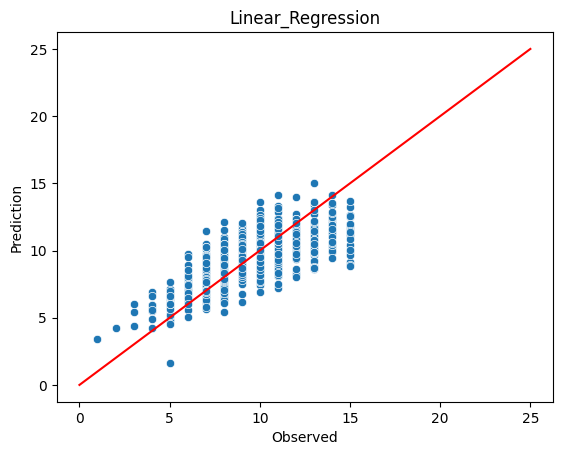

In [118]:
sns.scatterplot(x=y_test, y=lin_reg_pred)
plt.plot([0,25],[0,25], color='red')
plt.title('Linear_Regression')
plt.xlabel('Observed')
plt.ylabel('Prediction')


Text(0.5, 1.0, 'Residue distribution')

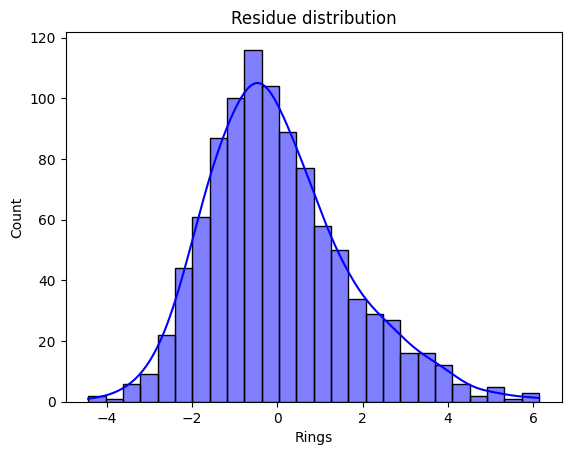

In [119]:
residue = y_test - lin_reg_pred
sns.histplot(residue, kde=True, color='blue')
plt.title('Residue distribution')

### Random Forest Regressor

In [120]:
randfor_reg = RandomForestRegressor(n_estimators=100, max_depth=6, max_samples=10, bootstrap=True, random_state=42).fit(X_train, y_train)

randfor_train_pred = randfor_reg.predict(X_train)
randfor_test_pred = randfor_reg.predict(X_test)

importances = list(randfor_reg.feature_importances_)
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Features': feature_names, 'Importance': importances})
scores = cross_val_score(randfor_reg, X, y, cv=10)

rmse_train = root_mean_squared_error(y_train, randfor_train_pred)
r2_train = r2_score(y_train, randfor_train_pred)
rmse = root_mean_squared_error(y_test, randfor_test_pred)
r2 = r2_score(y_test, randfor_test_pred)

randfor_perf_df = pd.DataFrame({'rmse_train': [rmse_train], 'rmse_test': [rmse_test], 'R2_train': [r2_train], 
                           'R2_test': [r2_test], 'cv_score_mean': [score.mean()], 'cv_score_std': [score.std()]})

randfor_perf_df
# print(feature_importance_df.sort_values(by='Importance', ascending=False))


,rmse_train,rmse_test,R2_train,R2_test,cv_score_mean,cv_score_std
0,1.791696,1.651903,0.444186,0.548537,0.462418,0.083308


Text(0, 0.5, 'Prediction')

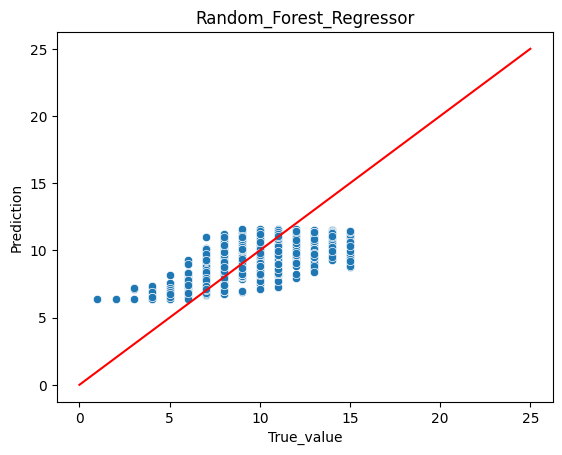

In [121]:
sns.scatterplot(x=y_test, y=randfor_test_pred)
plt.plot([0,25],[0,25], color='red')
plt.title('Random_Forest_Regressor')
plt.xlabel('True_value')
plt.ylabel('Prediction')

Text(0.5, 1.0, 'Residue distribution')

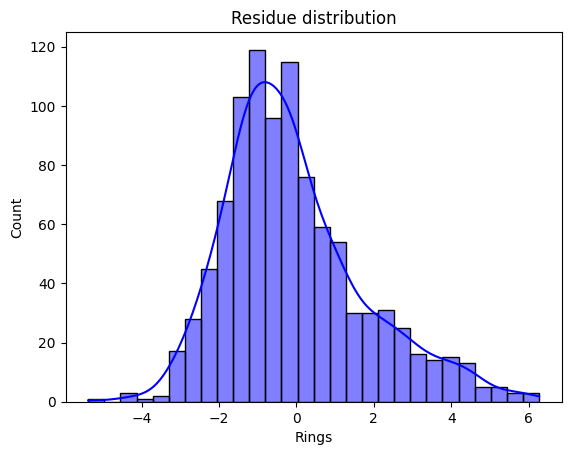

In [122]:
residue = y_test - randfor_test_pred

sns.histplot(x=residue, kde=True, color='blue')
plt.title('Residue distribution')

### XGB Regressor

In [123]:
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, alpha=6, max_depth=3,random_state=42).fit(X_train, y_train)

xgbreg_train_pred = randfor_reg.predict(X_train)
xgbreg_test_pred = randfor_reg.predict(X_test)

importances = list(xgb_reg.feature_importances_)
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Features': feature_names, 'Importance': importances})

scores = cross_val_score(xgb_reg, X, y, cv=10)

rmse_train = root_mean_squared_error(y_train, xgbreg_train_pred)
r2_train = r2_score(y_train, xgbreg_train_pred)
rmse = root_mean_squared_error(y_test, xgbreg_test_pred)
r2 = r2_score(y_test, xgbreg_test_pred)

xgbreg_perf_df = pd.DataFrame({'rmse_train': [rmse_train], 'rmse_test': [rmse_test], 'R2_train': [r2_train], 
                           'R2_test': [r2_test], 'cv_score_mean': [score.mean()], 'cv_score_std': [score.std()]})

xgbreg_perf_df
# print(feature_importance_df.sort_values(by='Importance', ascending=False))

,rmse_train,rmse_test,R2_train,R2_test,cv_score_mean,cv_score_std
0,1.791696,1.651903,0.444186,0.548537,0.462418,0.083308


In [124]:
from sklearn.model_selection import GridSearchCV

# Definir el rango de valores de alpha que deseas probar
param_grid = {
    'alpha': [0.0, 0.1, 1.0, 10.0],
    'lambda': [0.0, 1.0],  # Puedes ajustar esto también
}

# Crear el modelo XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Configurar la búsqueda en cuadrícula
grid_search = GridSearchCV(xgb_reg, param_grid, scoring='neg_mean_squared_error', cv=5)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor parámetro encontrado
best_alpha = grid_search.best_params_['alpha']
# print(f'El mejor valor de alpha es: {best_alpha}')
# print(depth)


In [125]:

alphas = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

alphas_list = []
r2_scores = []
rmse_scores = []

for a in alphas:
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, alpha= a, max_depth=4).fit(X_train, y_train)
    
    p = model.predict(X_test)

    R2 = r2_score(y_test, p)
    rmse = root_mean_squared_error(y_test, p)

    alphas_list.append(a)
    rmse_scores.append(rmse)
    r2_scores.append(R2)

scores_df = pd.DataFrame({'alpha': alphas_list, 'r2_score': r2_scores, 'rmse_score':rmse_scores})

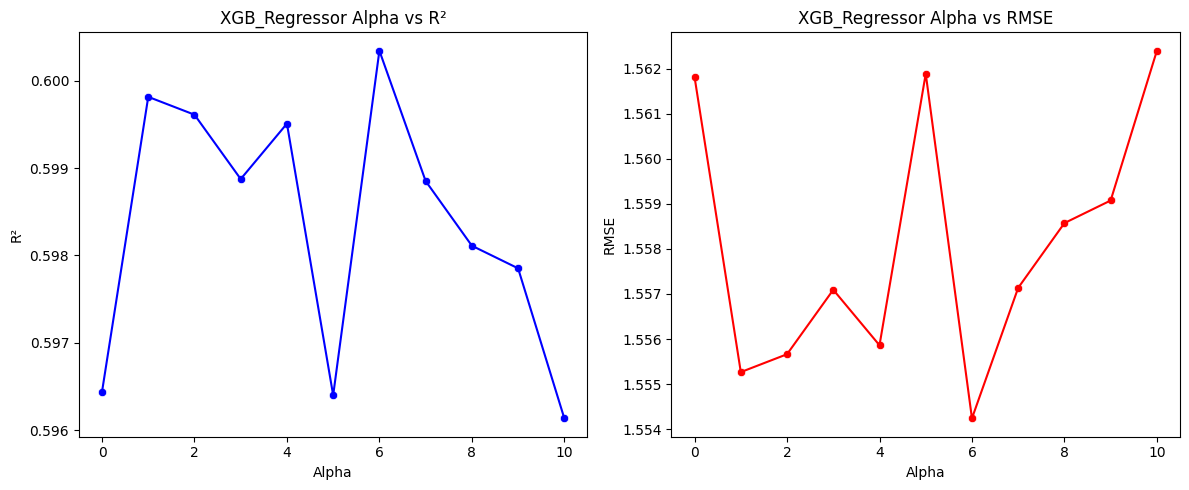

In [126]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de R²
sns.scatterplot(data=scores_df, x='alpha', y='r2_score', ax=axes[0], color='blue')
axes[0].plot(scores_df['alpha'], scores_df['r2_score'], color='blue', linestyle='-')
axes[0].set_title('XGB_Regressor Alpha vs R²')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('R²')

# Gráfico de RMSE
sns.scatterplot(data=scores_df, x='alpha', y='rmse_score', ax=axes[1], color='red')
axes[1].plot(scores_df['alpha'], scores_df['rmse_score'], color='red', linestyle='-')
axes[1].set_title('XGB_Regressor Alpha vs RMSE')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('RMSE')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

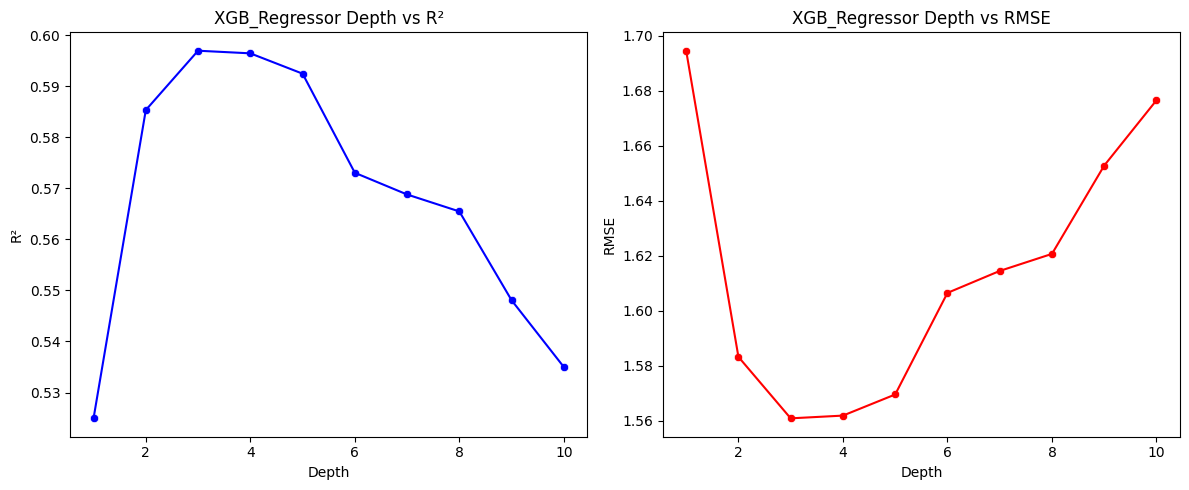

In [127]:
depths = np.arange(1,11,1)

depth_list = []
r2_scores = []
rmse_scores = []

for d in depths:
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=d).fit(X_train, y_train)
    
    p = model.predict(X_test)

    R2 = r2_score(y_test, p)
    rmse = root_mean_squared_error(y_test, p)

    rmse_scores.append(rmse)
    depth_list.append(d)
    r2_scores.append(R2)

scores_df = pd.DataFrame({'depth': depth_list, 'r2_score': r2_scores, 'rmse_score':rmse_scores})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de R²
sns.scatterplot(data=scores_df, x='depth', y='r2_score', ax=axes[0], color='blue')
axes[0].plot(scores_df['depth'], scores_df['r2_score'], color='blue', linestyle='-')
axes[0].set_title('XGB_Regressor Depth vs R²')
axes[0].set_xlabel('Depth')
axes[0].set_ylabel('R²')

# Gráfico de RMSE
sns.scatterplot(data=scores_df, x='depth', y='rmse_score', ax=axes[1], color='red')
axes[1].plot(scores_df['depth'], scores_df['rmse_score'], color='red', linestyle='-')
axes[1].set_title('XGB_Regressor Depth vs RMSE')
axes[1].set_xlabel('Depth')
axes[1].set_ylabel('RMSE')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Prediction')

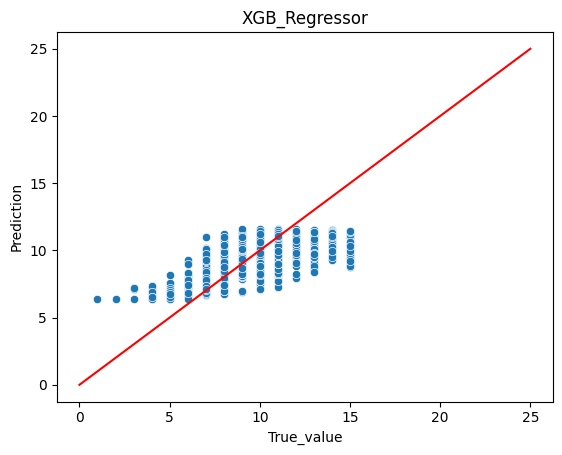

In [128]:
sns.scatterplot(x=y_test, y=xgbreg_test_pred)
plt.plot([0,25],[0,25], color='red')
plt.title('XGB_Regressor')
plt.xlabel('True_value')
plt.ylabel('Prediction')

Text(0.5, 1.0, 'Residue distribution')

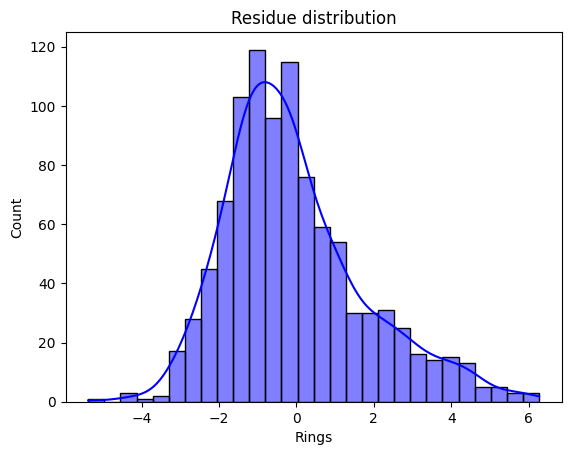

In [129]:
residue = y_test - randfor_test_pred

sns.histplot(x=residue, kde=True, color='blue')
plt.title('Residue distribution')

### Voting Regressor

In [130]:
v_reg = VotingRegressor(estimators=[
    ('lr', linear_model.Lasso(alpha=0.1)),
    ('xgbr', XGBRegressor(n_estimators=100, learning_rate=0.1, alpha= 6, max_depth= 3, random_state=42)),
    ('knn', KNeighborsRegressor(15, weights='distance'))
]).fit(X_train, y_train)

# ('xgbr', XGBRegressor(n_estimators=100, learning_rate=0.1, alpha= 9, max_depth= 5, random_state=42)),

voting_train_pred = v_reg.predict(X_train)
voting_test_pred = v_reg.predict(X_test)

rmse_train = root_mean_squared_error(y_train, voting_train_pred)
r2_train = r2_score(y_train, voting_train_pred)
rmse_test = root_mean_squared_error(y_test, voting_test_pred)
r2_test = r2_score(y_test, voting_test_pred)
score = cross_val_score(v_reg, X,y, cv=10)

vreg_df = pd.DataFrame({'rmse_train': [rmse_train], 'rmse_test': [rmse_test], 'R2_train': [r2_train], 
                           'R2_test': [r2_test], 'cv_score_mean': [score.mean()], 'cv_score_std': [score.std()]})
vreg_df

,rmse_train,rmse_test,R2_train,R2_test,cv_score_mean,cv_score_std
0,1.014454,1.554417,0.821817,0.600251,0.519777,0.07051


Text(0, 0.5, 'Prediction')

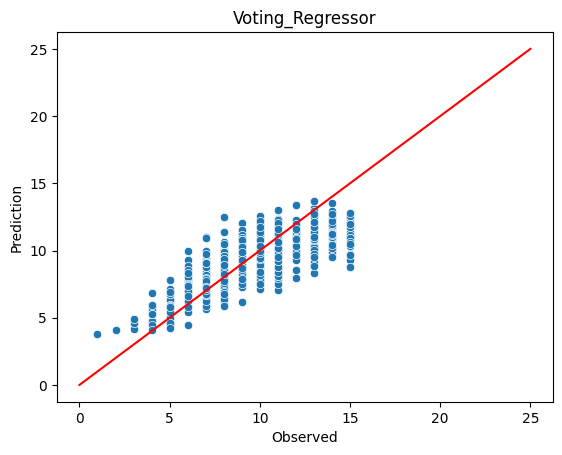

In [131]:
sns.scatterplot(x=y_test, y=voting_test_pred)
plt.plot([0,25],[0,25], color='red')
plt.title('Voting_Regressor')
plt.xlabel('Observed')
plt.ylabel('Prediction')

Text(0.5, 1.0, 'Residue distribution')

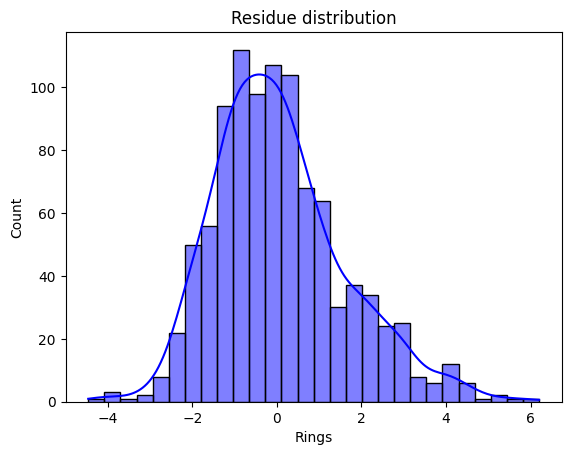

In [132]:
residue = y_test - voting_test_pred

sns.histplot(x=residue, kde=True, color='blue')
plt.title('Residue distribution')

## Linear Regression (Lasso)

In [133]:

lr_lasso = linear_model.Lasso(alpha=0.1).fit(X_train, y_train)

lrlasso_train_pred = lr_lasso.predict(X_train)
lrlasso_test_pred = lr_lasso.predict(X_test)

rmse_train = root_mean_squared_error(y_train, lrlasso_train_pred)
r2_train = r2_score(y_train, lrlasso_train_pred)
rmse_test = root_mean_squared_error(y_test, lrlasso_test_pred)
r2_test = r2_score(y_test, lrlasso_test_pred)
score = cross_val_score(lr_lasso, X,y, cv=10)

coeficients = lr_lasso.coef_


atributes_weight = pd.DataFrame({
    'Atribute': X.columns,
    'Weight': coeficients
})

features_selected = atributes_weight[atributes_weight['Weight'] != 0]

features_selected = features_selected.reindex(features_selected.Weight.abs().sort_values(ascending=False).index).reset_index(drop=True)

lrlasso_df = pd.DataFrame({'rmse_train': [rmse_train], 'rmse_test': [rmse_test], 'R2_train': [r2_train], 
                           'R2_test': [r2_test], 'cv_score_mean': [score.mean()], 'cv_score_std': [score.std()]})

print(lrlasso_df)
# print(coeficients)

features_selected

   rmse_train  rmse_test  R2_train   R2_test  cv_score_mean  cv_score_std
0    1.654506   1.657641  0.526044  0.545396       0.447721      0.084268


,Atribute,Weight
0,Sex_I,-0.175141
1,Height,0.076554
2,Shucked_weight,-0.059089
3,Diameter,0.052549
4,Shell_weight,0.027090
5,Whole_weight,0.019029
6,Viscera_weight,-0.008620
7,Length,0.003626


Text(0, 0.5, 'Prediction')

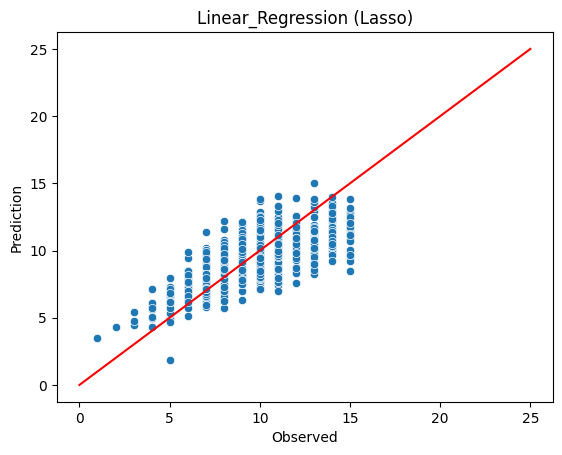

In [134]:
sns.scatterplot(x=y_test, y=lrlasso_test_pred)
plt.plot([0,25],[0,25], color='red')
plt.title('Linear_Regression (Lasso)')
plt.xlabel('Observed')
plt.ylabel('Prediction')

Text(0.5, 1.0, 'Residue distribution')

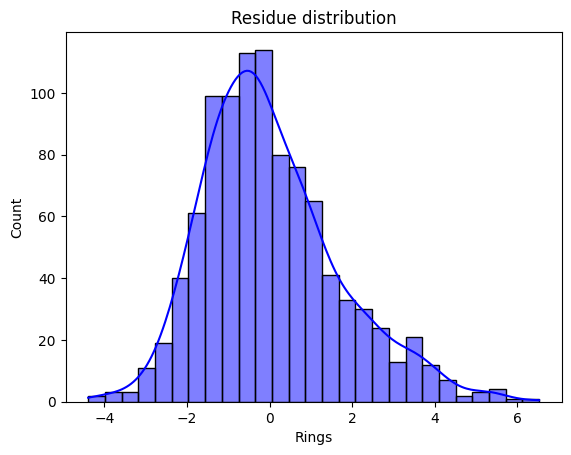

In [135]:
residue = y_test - lrlasso_test_pred

sns.histplot(x=residue, kde=True, color='blue')
plt.title('Residue distribution')

### KNeighbors Regressor

In [136]:
k = 16

knn = KNeighborsRegressor(k, weights='distance').fit(X_train, y_train)

knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

rmse_train = root_mean_squared_error(y_train, knn_train_pred)
r2_train = r2_score(y_train, knn_train_pred)
rmse_test = root_mean_squared_error(y_test, voting_test_pred)
r2_test = r2_score(y_test, voting_test_pred)
score = cross_val_score(v_reg, X,y, cv=10)

knnreg_df = pd.DataFrame({'rmse_train': [rmse_train], 'rmse_test': [rmse_test], 'R2_train': [r2_train],
                           'R2_test': [r2_test], 'cv_score_mean': [score.mean()], 'cv_score_std': [score.std()]})
knnreg_df

,rmse_train,rmse_test,R2_train,R2_test,cv_score_mean,cv_score_std
0,0.0,1.554417,1.0,0.600251,0.519777,0.07051


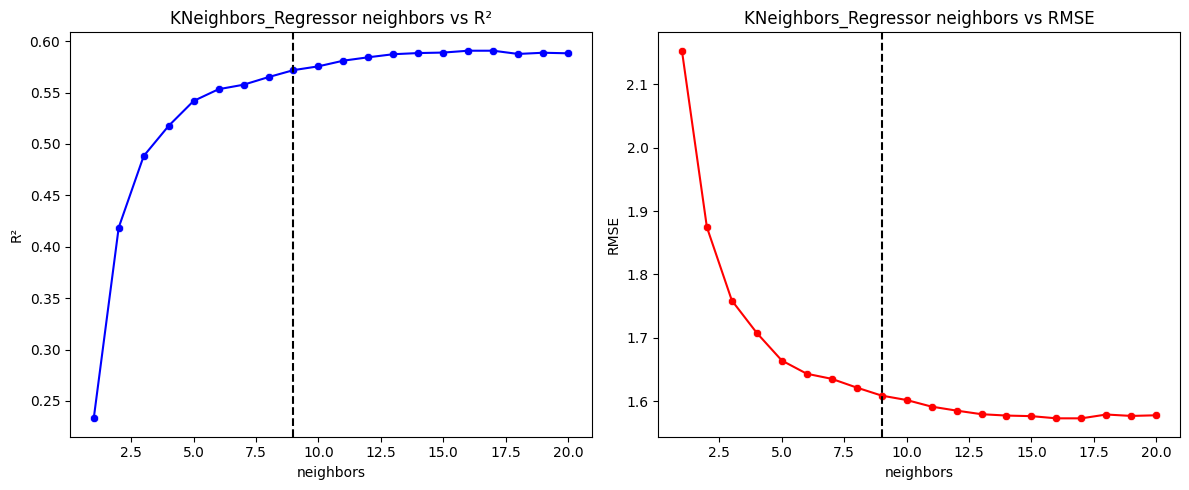

In [137]:
n_neighbors = np.arange(1,21,1)

neighbors_list = []
r2_scores = []
rmse_scores = []
# knn = KNeighborsRegressor()
for n in n_neighbors:
    model = knn = KNeighborsRegressor(n, weights='distance').fit(X_train, y_train)
    
    p = model.predict(X_test)

    R2 = r2_score(y_test, p)
    rmse = root_mean_squared_error(y_test, p)

    neighbors_list.append(n)
    rmse_scores.append(rmse)
    r2_scores.append(R2)

scores_df = pd.DataFrame({'neighbors': neighbors_list, 'r2_score': r2_scores, 'rmse_score':rmse_scores})

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de R²
sns.scatterplot(data=scores_df, x='neighbors', y='r2_score', ax=axes[0], color='blue')
axes[0].plot(scores_df['neighbors'], scores_df['r2_score'], color='blue', linestyle='-')
axes[0].axvline(x=9, color='black', linestyle='--')
axes[0].set_title('KNeighbors_Regressor neighbors vs R²')
axes[0].set_xlabel('neighbors')
axes[0].set_ylabel('R²')

# Gráfico de RMSE
sns.scatterplot(data=scores_df, x='neighbors', y='rmse_score', ax=axes[1], color='red')
axes[1].plot(scores_df['neighbors'], scores_df['rmse_score'], color='red', linestyle='-')
axes[1].axvline(x=9, color='black', linestyle='--')
axes[1].set_title('KNeighbors_Regressor neighbors vs RMSE')
axes[1].set_xlabel('neighbors')
axes[1].set_ylabel('RMSE')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
# print(n_neighbors)

### Stacking Regressor

In [138]:
from sklearn.ensemble import StackingRegressor

estimators= [
    ('lr', LinearRegression()),
    ('xgbr', XGBRegressor(n_estimators=100, learning_rate=0.1, alpha= 6, max_depth= 3, random_state=42)),
    ('knn', KNeighborsRegressor(15, weights='distance'))
]

stacking_reg = StackingRegressor(estimators=estimators, final_estimator=linear_model.Lasso(alpha=0.1)).fit(X_train, y_train)

stkreg_train_pred = stacking_reg.predict(X_train)
stkreg_test_pred = stacking_reg.predict(X_test)

rmse_train = root_mean_squared_error(y_train, stkreg_train_pred)
r2_train = r2_score(y_train, stkreg_train_pred)
rmse_test = root_mean_squared_error(y_test, stkreg_test_pred)
r2_test = r2_score(y_test, stkreg_test_pred)
score = cross_val_score(stacking_reg, X,y, cv=10)

stkreg_df = pd.DataFrame({'rmse_train': [rmse_train], 'rmse_test': [rmse_test], 'R2_train': [r2_train],
                           'R2_test': [r2_test], 'cv_score_mean': [score.mean()], 'cv_score_std': [score.std()]})
stkreg_df

,rmse_train,rmse_test,R2_train,R2_test,cv_score_mean,cv_score_std
0,1.00196,1.540734,0.826179,0.607257,0.525173,0.069341
